## Assignment#4 - Sentiment Analysis

## Submitted by Sangeeta Gollapalli


#### Sentiment Analysis on Amazon reviews

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gsang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Dataset Loading and Preprocessing Data

In [2]:
# Load dataset
df = pd.read_csv('amazon_reviews.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [3]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

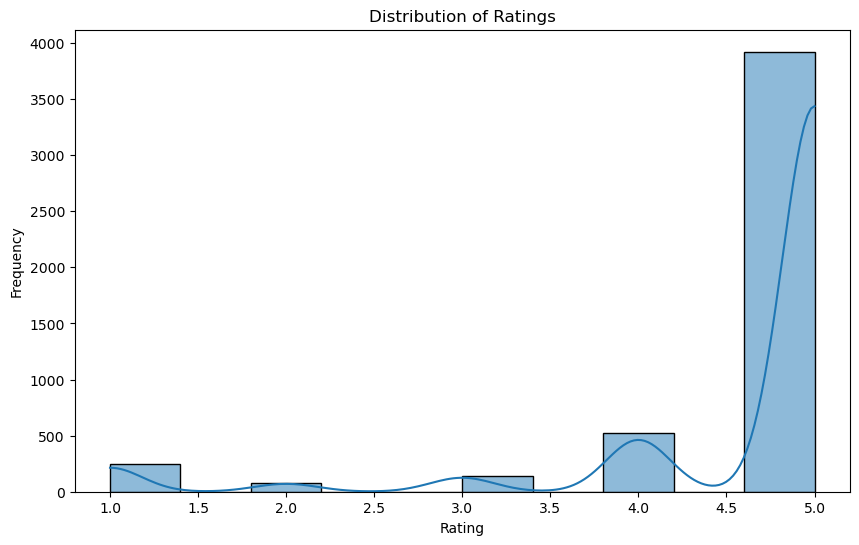

In [4]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['overall'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Generate Word Clouds

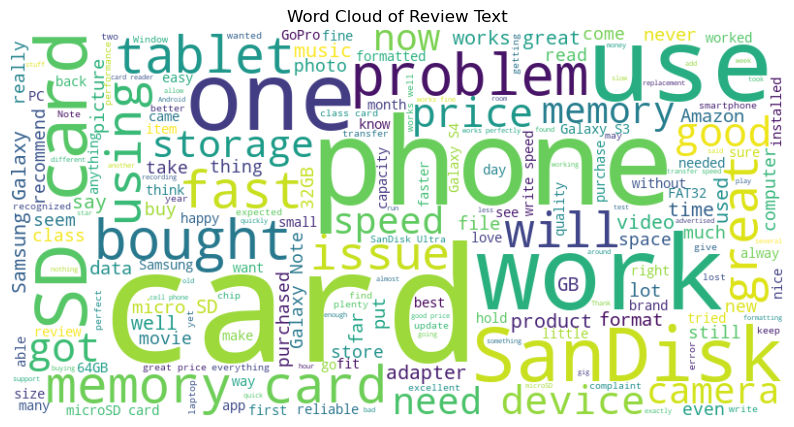

In [5]:
# Generate a word cloud
text = ' '.join(df['reviewText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()


In [7]:
# Replace NaN values with empty strings and ensure all values are strings
df['reviewText'] = df['reviewText'].fillna('').astype(str)


#### Initialize Vectorizer and Transform Data

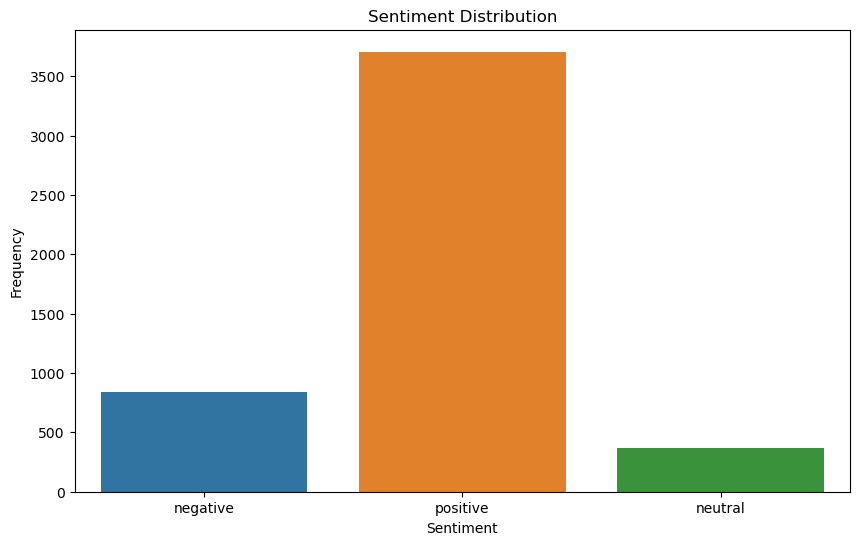

In [8]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment
def categorize_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['reviewText'].apply(categorize_sentiment)

# Display the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


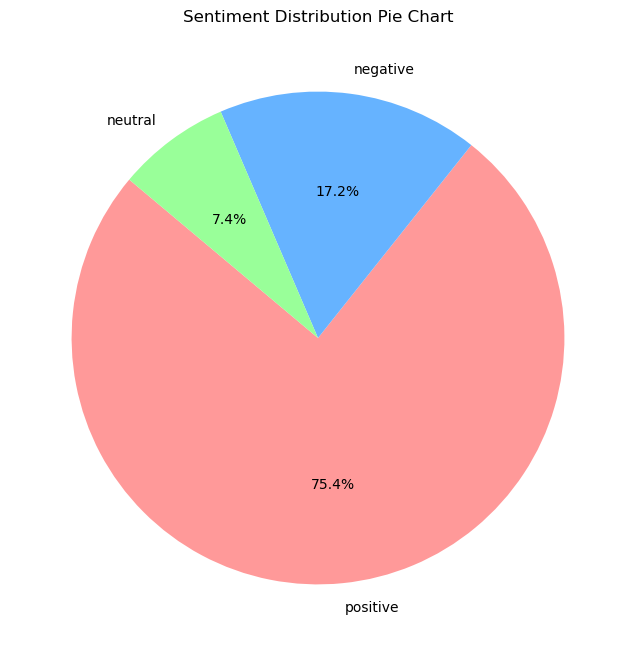

In [9]:
# Pie chart of sentiment distribution
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=140)
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')
plt.show()


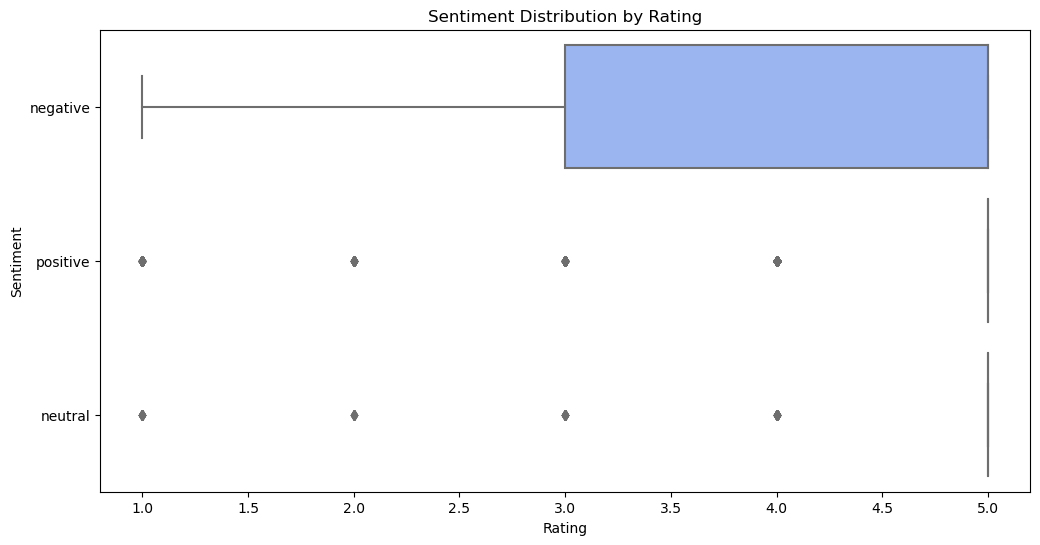

In [10]:
# Create a box plot to see sentiment distribution across ratings
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='overall', y='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()


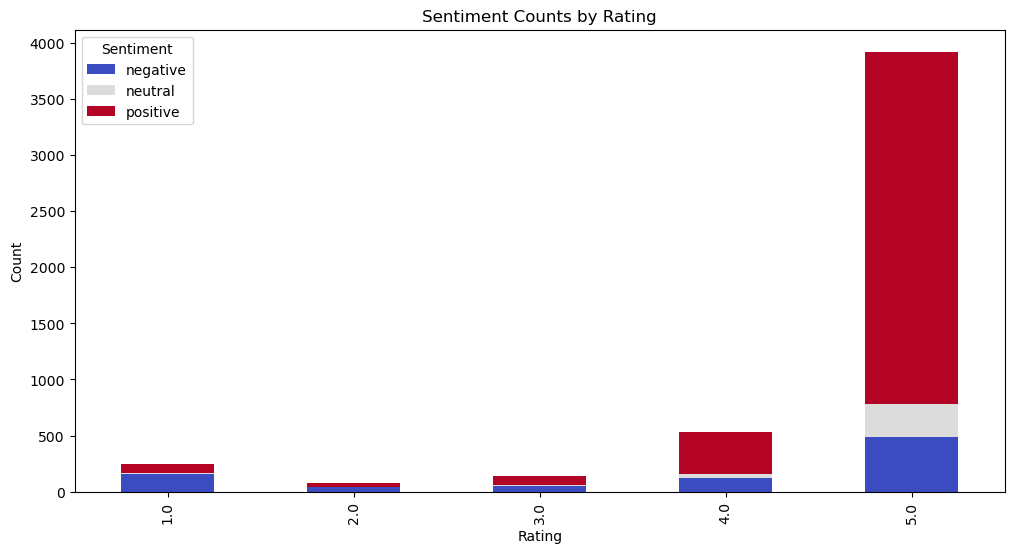

In [11]:
# Group by rating and calculate sentiment counts
sentiment_by_rating = df.groupby('overall')['sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment counts by rating
sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Sentiment Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


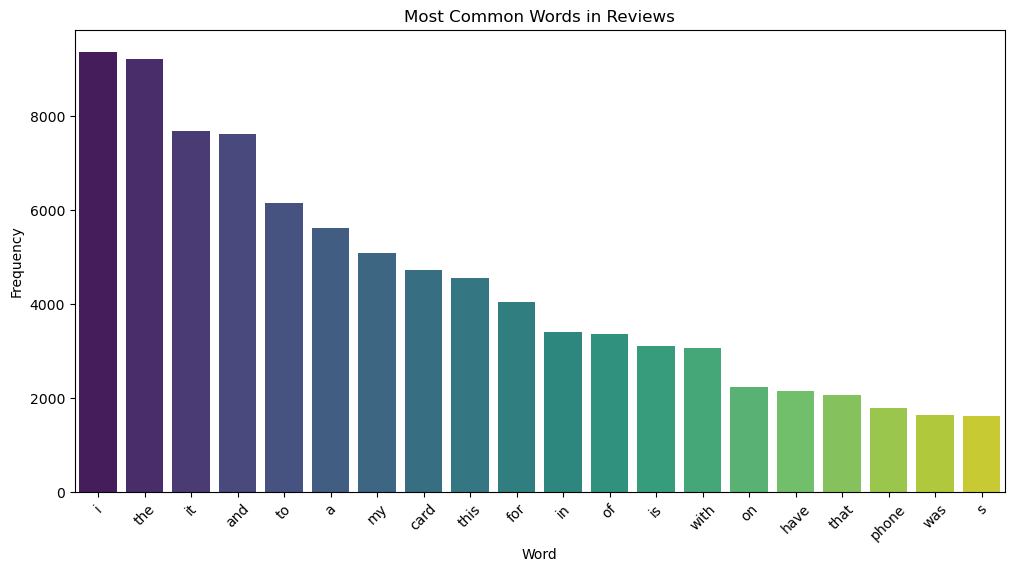

In [12]:
from collections import Counter
import re

# Tokenize and clean the review text
def tokenize(text):
    words = re.findall(r'\w+', text.lower())
    return words

# Create a list of all words
all_words = [word for review in df['reviewText'] for word in tokenize(review)]

# Count word frequencies
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Word', y='Frequency', palette='viridis')
plt.title('Most Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


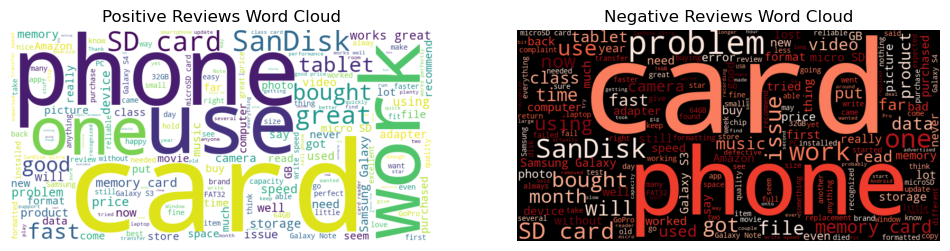

In [18]:
# Separate text by sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['reviewText'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['reviewText'])

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.show()


In [19]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Convert text to features
X = vectorizer.fit_transform(df['reviewText'])
y = df['sentiment']


#### Train-Test Split and Model Training

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


#### Evaluate Model Performance

In [21]:
# Display classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       181
     neutral       1.00      0.01      0.03        78
    positive       0.74      1.00      0.85       724

    accuracy                           0.74       983
   macro avg       0.58      0.34      0.29       983
weighted avg       0.62      0.74      0.63       983

Confusion Matrix:
 [[  0   0 181]
 [  0   1  77]
 [  0   0 724]]


C:\Users\gsang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gsang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gsang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Exporting the CSV file updated with sentiment column

In [22]:
# Apply sentiment analysis
df['sentiment'] = df['reviewText'].apply(categorize_sentiment)

# Save the DataFrame with sentiment labels to a CSV file
df.to_csv('amazon_reviews_with_sentiment.csv', index=False)
